## Zadanie 1 (5b)

V tomto zadaní budete pracovať s datasetom Heart Failure Clinical Records, ktorý obsahuje záznamy pacientov so zlyhaním srdca, zozbierané počas obdobia ich sledovania.

Dataset je dostupný online: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Na stránke nájdete aj doplňujúce informácie o premenných, ktoré dataset obsahuje. (Odporúčam prečítať :) ) 


In [2]:
# link necessary libraries
library(tidyverse)
library(corrplot)

# settings for plot visualisation
options(repr.plot.height = 5, repr.plot.res = 200)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded



Načítanie datasetu - dataset viete funkciami dostupnými v R stiahnuť a rozbaliť aj z formátu ZIP

In [4]:
# URL of the dataset
dataset_url <- "https://archive.ics.uci.edu/static/public/519/heart+failure+clinical+records.zip"

# create temporary destination file path with .zip extension
dest_file <- tempfile(fileext = ".zip")

# download the dataset, mode = write binary
download.file(dataset_url, destfile = dest_file, mode = "wb")

# unzip the file into chosen location (enter directory)
unzip(dest_file, exdir = "C:/Users/akraj/Desktop/FRIčka/4L/SSBI/cv3/hearth_failure") # TODO fill in

### Úloha 1 (1b)

Načítajte dataset do premennej `data_hw`.

In [5]:
# TODO
dest_file <- "C:/Users/akraj/Desktop/FRIčka/4L/SSBI/cv3/hearth_failure/hw.csv"
data_hw <- read.csv(dest_file)

   **Obsahuje dataset chýbajúce hodnoty (NA) ?**

In [12]:
# TODO
is.na(data_hw)
# Dataset neobsahuje NA hodnoty

age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


**Aký typ majú vybrané premenné v datasete ? (numerické/kategorické)** (Ak by ste si pri niektorých premenných neboli istí, zdôvodnite svoju odpoveď.)

- age
- anaemia 
- high_blood_pressure
- serum_sodium
- death_event

In [52]:
# TODO
glimpse(data_hw)
class(data_hw$age)
class(data_hw$anaemia)
class(data_hw$high_blood_pressure)
class(data_hw$serum_sodium)
class(data_hw$DEATH_EVENT)

#age = typu numeric, numericka premenna -
#anaemia = typu integer, kategoricka premenna - obsahuje binarne hodnoty 0,1 ci pacient ma anemiu alebo nie
#high_blood_pressure = typu integer, kategoricka premenna - obsahuje binarne hodnoty 0,1 ci ma pacient vysoky krvny tlak
#serum_sodium = typu integer, numericka premenna - predstavuje hodnoty pacienta
#death_event - Null -> v datasete je ulozena premenna ako DEATH_EVENT -> je typu integer,ta sa da povazovat za kategoricku nakolko tiez obsahuje hodnoty 0,1 ci
                       #ci pacient umrel alebo nie

Rows: 299
Columns: 13
$ age                      <dbl> 75, 55, 65, 50, 65, 90, 75, 60, 65, 80, 75, 6…
$ anaemia                  <int> 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, …
$ creatinine_phosphokinase <int> 582, 7861, 146, 111, 160, 47, 246, 315, 157, …
$ diabetes                 <int> 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ ejection_fraction        <int> 20, 38, 20, 20, 20, 40, 15, 60, 65, 35, 38, 2…
$ high_blood_pressure      <int> 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, …
$ platelets                <dbl> 265000, 263358, 162000, 210000, 327000, 20400…
$ serum_creatinine         <dbl> 1.90, 1.10, 1.30, 1.90, 2.70, 2.10, 1.20, 1.1…
$ serum_sodium             <int> 130, 136, 129, 137, 116, 132, 137, 131, 138, …
$ sex                      <int> 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, …
$ smoking                  <int> 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, …
$ time                     <int> 4, 6, 7, 7, 8, 8, 10, 10, 10, 10, 10, 10, 11,…
$ DEATH_EVENT     

[1] "numeric"

[1] "integer"

[1] "integer"

[1] "integer"

[1] "integer"

**Obsahuje dataset duplicitné záznamy?**

In [22]:
# TODO
any(duplicated(data_hw)) # vrati TRUE ak aspon jeden zaznam je duplicitny
anyDuplicated(data_hw) # vrati 1 ak je aspon 1 zaznam duplicitny

# dataset neobsahuje duplicitne zaznamy

[1] FALSE

[1] 0

### Úloha 2 (1b)

Skúmajte premennú 'sex' (pohlavie). Premenná je kódovaná hodnotami 0 a 1. ( 0 = žena, 1 = muž) 

In [117]:
# TODO
glimpse(data_hw$sex)

 int [1:299] 1 1 1 1 0 1 1 1 0 1 ...


**Koľko záznamov mužov a žien obsahuje dataset?**

In [32]:
# TODO
sex_count <- table(data_hw$sex)
View(sex_count)

# 


  0   1 
105 194 

** Dataset obsahuje 194 muzov a 105 zien. **

**Koľko mužov a žien je nefajčiarov ? (0 = nefajčiar, 1 = fajčiar)**

In [38]:
# TODO
non_smokers <- table(ifelse(data_hw$sex == 0, "žena", "muž"), data_hw$smoking)
View(non_smokers)


      
         0   1
  muž  102  92
  žena 101   4

** Muzov nefajciarov je 102, zien nefajciariek je 101. **

### Úloha 3 (1b)

Popíšte premennú 'age' (vek).

In [50]:
# TODO
summary(data_hw$age)
vek_counts <- table(data_hw$age)
vek_counts
median(data_hw$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  40.00   51.00   60.00   60.83   70.00   95.00 


    40     41     42     43     44     45     46     47     48     49     50 
     7      1      7      1      2     19      3      1      2      4     27 
    51     52     53     54     55     56     57     58     59     60 60.667 
     4      5     10      2     17      1      2     10      4     33      2 
    61     62     63     64     65     66     67     68     69     70     72 
     4      5      8      3     26      2      2      5      3     25      7 
    73     75     77     78     79     80     81     82     85     86     87 
     4     11      2      2      1      7      1      3      6      1      1 
    90     94     95 
     3      1      2 

[1] 60

** Premenna age predstavuje vek pacientov v rokoch, ide o numericku hodnotu. **

**Aký je minimálny, maximálny a priemerný vek pacientov v datasete?**

Minimalny vek pacientov je 40. 
Maximalny vek pacientov je 95.
Priemerny vek pacientov je 60.83 -> 61.

**Z akého veku je v datasete najviac záznamov?**

Najviac zastupeny je vek 60 s poctom 33 - 35 -> tabulka
alebo to vieme zistit medianom



### Úloha 4 (1b)

Pridajte do datasetu novú premennú s názvom `risk`, ktorá bude predstavovať riziko úmrtia pacienta po zlyhaní srdca. Táto premenná bude kategorická a bude obsahovať hodnoty 'Low' a 'High'. 
Premennú vytvorte na základe if-else rozhodovania podľa premenných 'age' a 'serum_creatinine':

- Ak je vek pacienta väčší ako 50 a zároveň level kreatinínu v krvnom sére ('serum_creatinine') je väčší ako 1.2 mg/dL, tak hodnota premennej 'Risk' je 'High'.
- V opačnom prípade je hodnota 'Low'

- pre vytvorenie premennej použite funkciu ifelse - https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/ifelse

In [59]:
data_hw$risk <- ifelse(data_hw$age > 50 & data_hw$serum_creatinine > 1.2, "High", "Low")


Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

- počet stĺpcov (atribút 'breaks') môže mať predvolenú hodnotu, nemusíte ho špecifikovať

- funkcia hist - https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/hist

(hint: použite funkciu filter na záznamy, kde 'risk' == 'High', a v histograme ako dáta vložte hodnoty z premennej 'age')

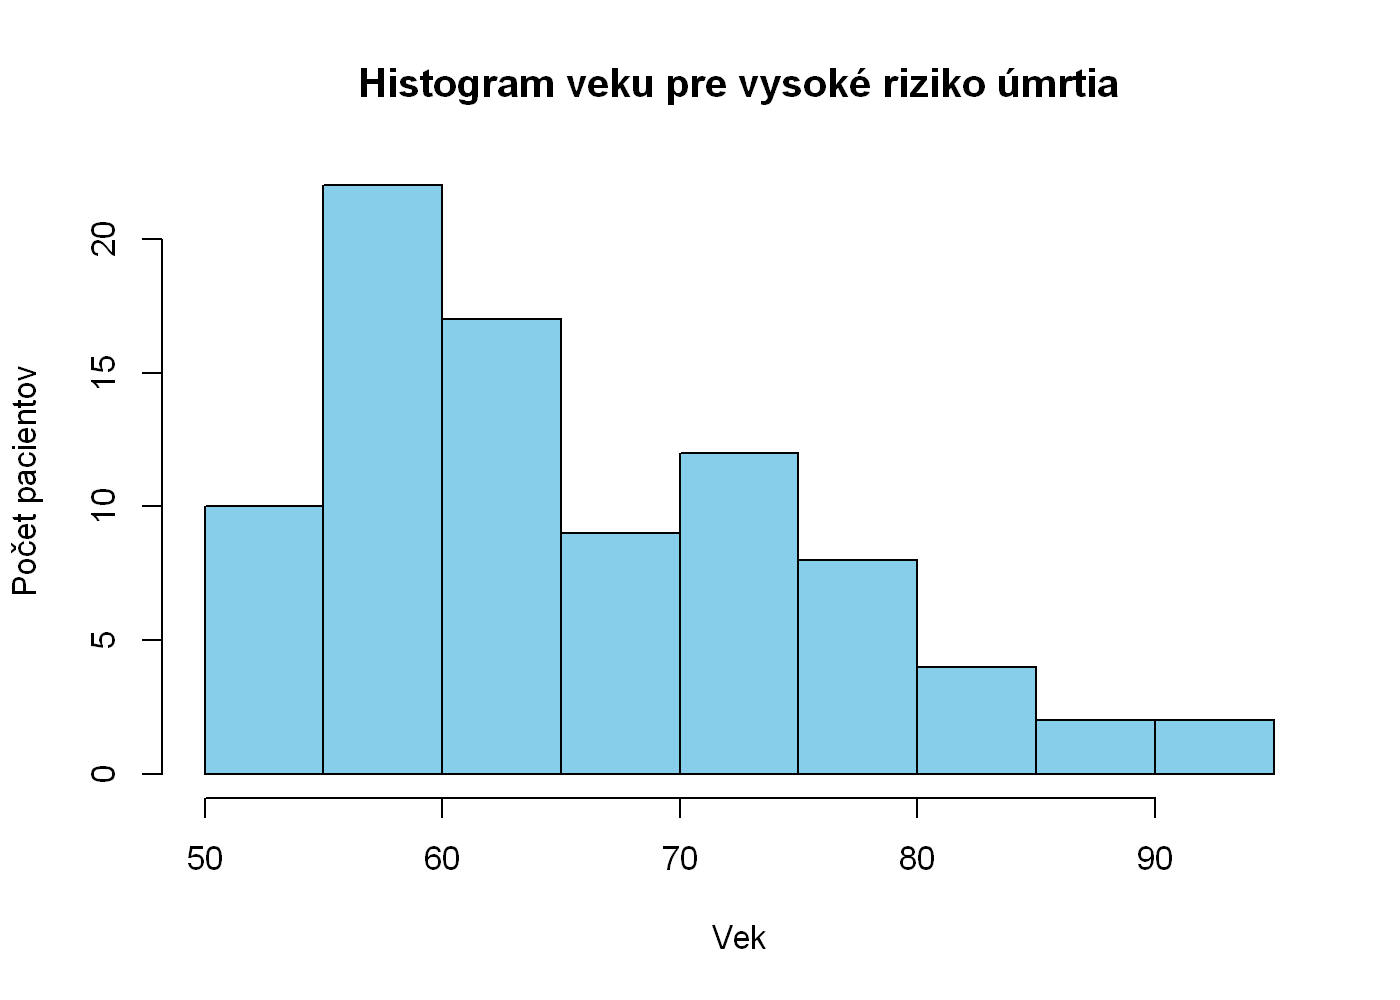

In [90]:
high_risk <- subset(data_hw, risk == 'High')

hist(high_risk$age, main = "Histogram veku pre vysoké riziko úmrtia", xlab = "Vek", ylab = "Počet pacientov", col = "skyblue", border = "black", breaks = 10)



**V akom veku je riziko zlyhania srdca najväčšie?**

Najvacsie riziko umrtia je vo veku 55-65 rokov



**Koľko záznamov (približne) je v datasete v tejto vekovej kategórii?**

In [93]:
# TODO
zaznamy_count <- sum(high_risk$age > 50 & high_risk$age <= 65)
zaznamy_count

[1] 49

### Úloha 5 (1b)

Analyzujte koreláciu medzi všetkými atribútmi tohto datasetu (napr. vytvorením correlation plot)

- korelácia sa dá analyzovať iba na numerických premenných, preto musíte dátový typ premennej zmeniť na kategorický a ten uložiť vo formáte 'integer' alebo 'numeric'.


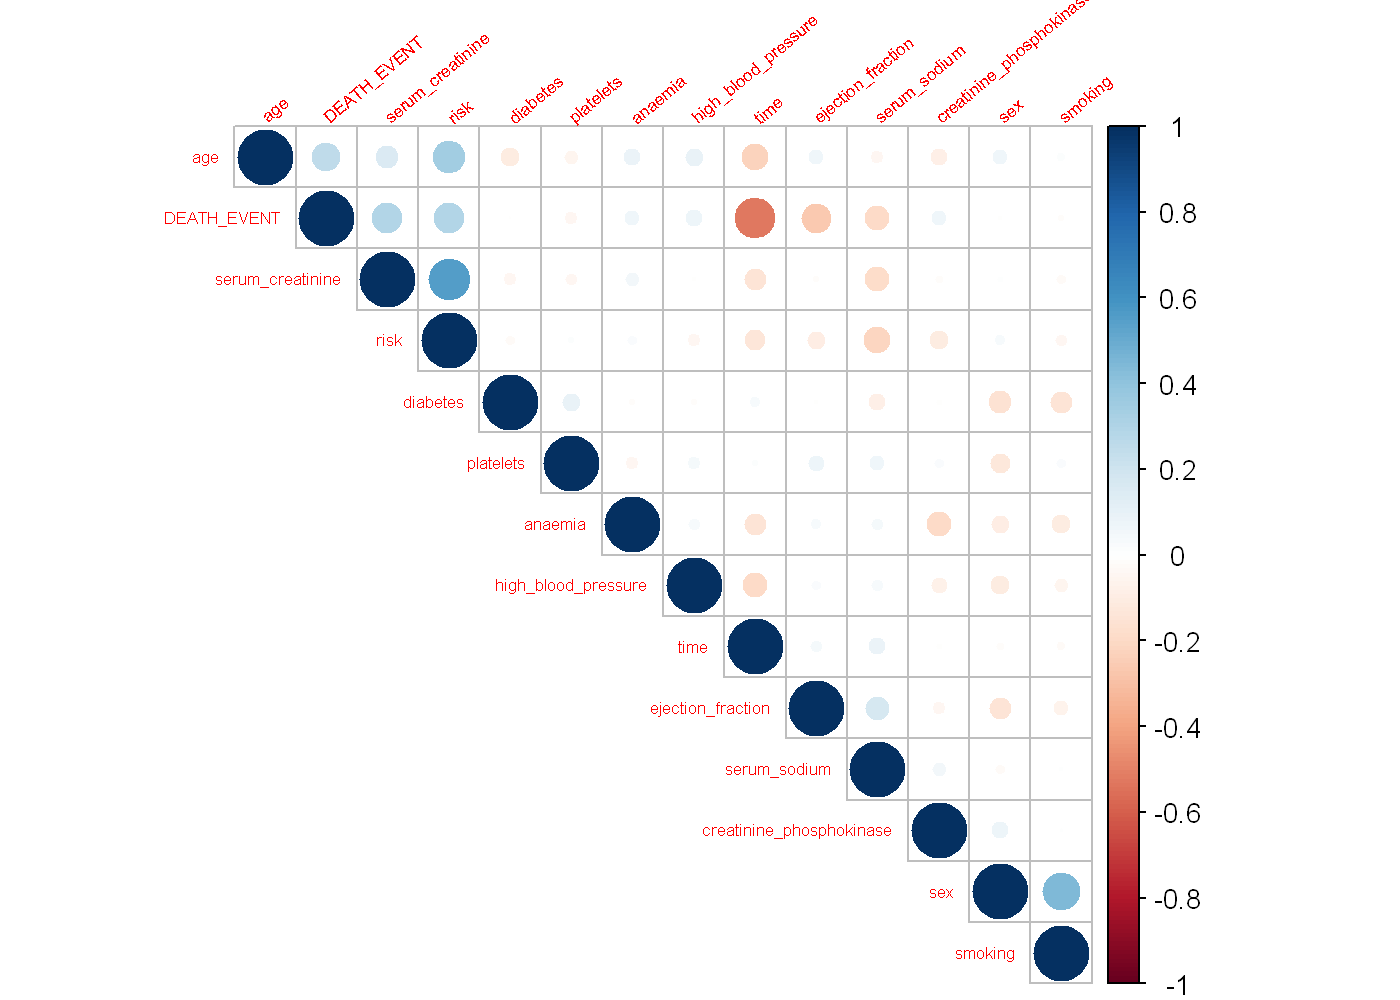

In [115]:
# TODO
#glimpse(data_hw)
#treba konvertovat risk -> z high/low na 1/0
data_converted <- data_hw
data_converted$risk <- ifelse(data_hw$risk == 'High', 1, 0)
correlation_matrix <- cor(data_converted)

corrplot(correlation_matrix, order="hclust", type='upper',tl.srt = 40, tl.cex = 0.5)


**Ktoré atribúty majú medzi sebou najväčšiu zápornú koreláciu?** (uveďte prvé dve dvojice)

1. death_event a time
2. death_event a ejection_fraction

**Ktoré atribúty majú medzi sebou najväčšiu kladnú koreláciu?** (uveďte prvú dvojicu)

serum_creatine a risk

----

Viac informácií o zlyhaní srdca: https://www.nhlbi.nih.gov/health/heart-failure